## Neural Networks

#### Importing Libraries

In [524]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

#### Importing CSV file

In [525]:
df = pd.read_csv('winequality-red.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### EDA 

Checking the shape of DataFrame

In [526]:
df.shape

(1599, 12)

Information about the columns

In [527]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Checking for number of unique values

In [528]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

Checking for missing values 

In [529]:
missing_count = (df.isnull().sum())
print(missing_count[missing_count > 0])

Series([], dtype: int64)


#### Plot

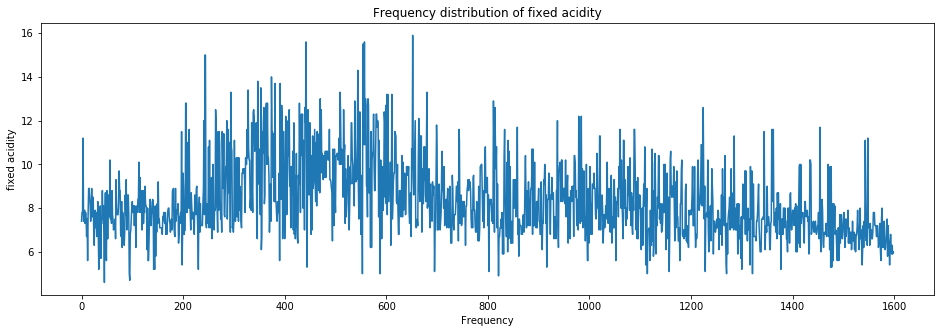

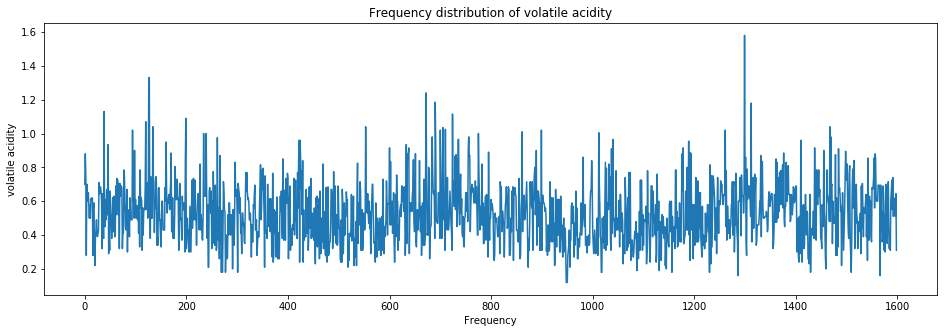

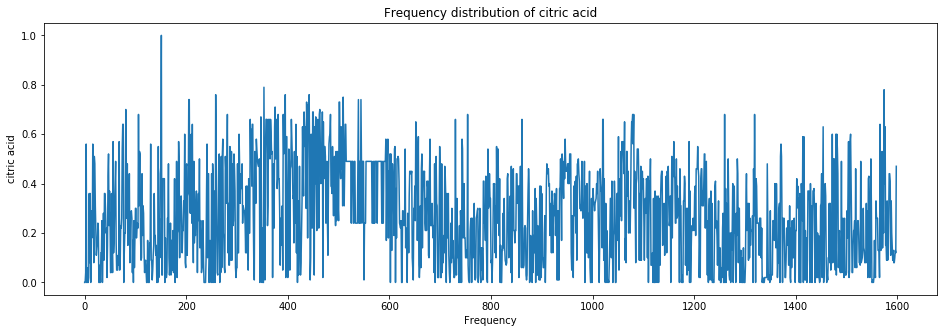

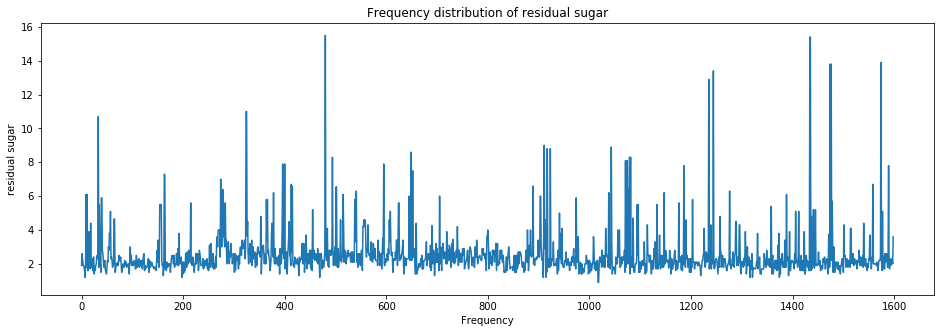

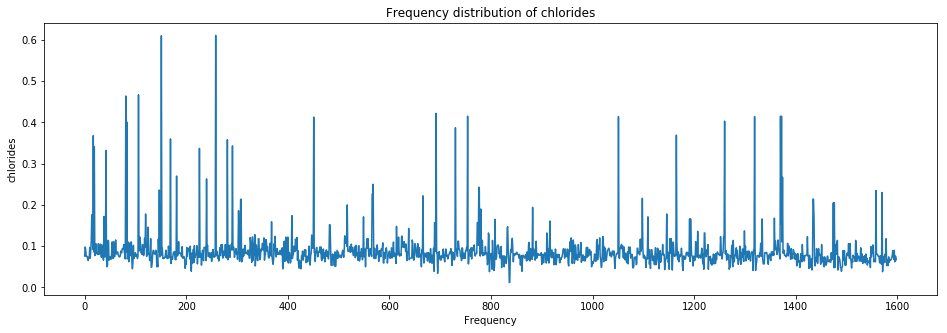

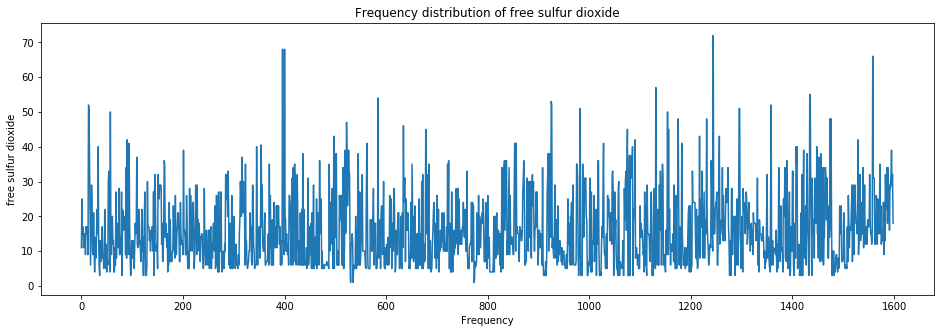

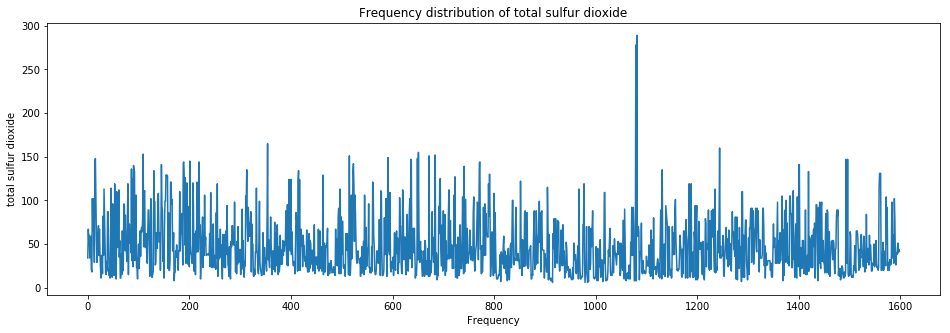

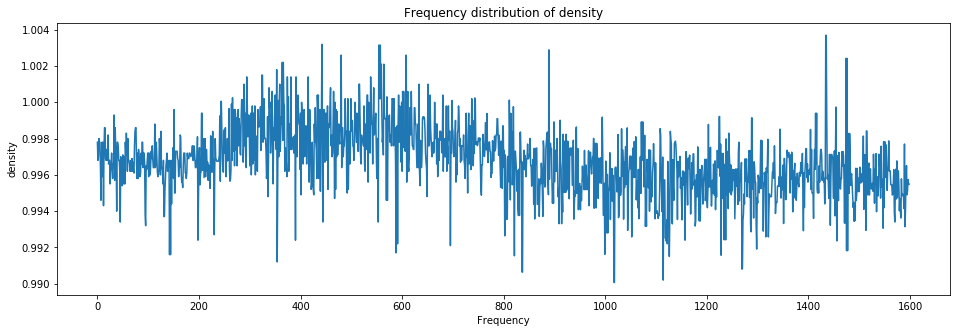

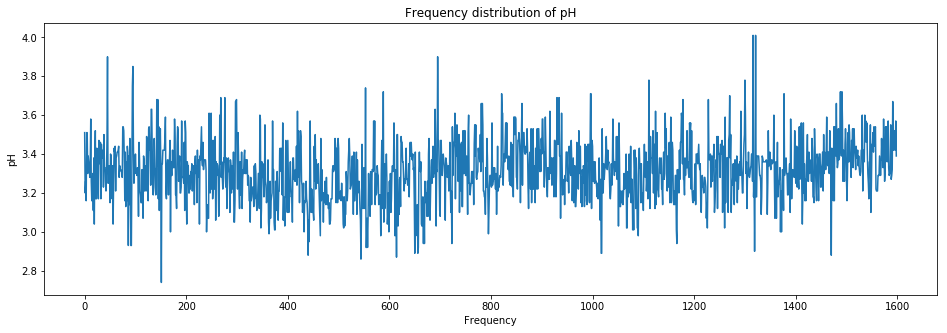

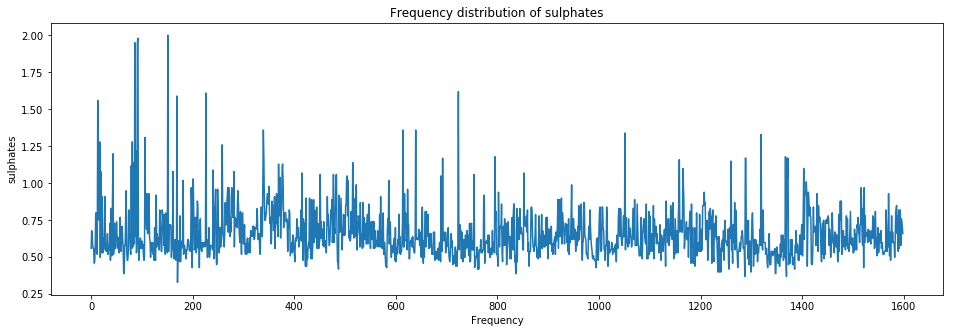

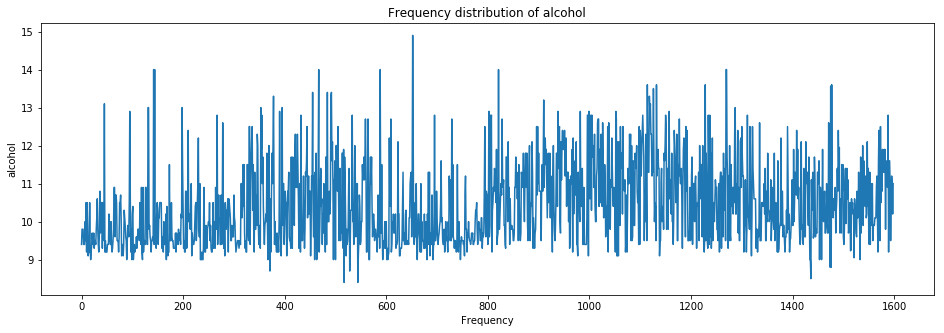

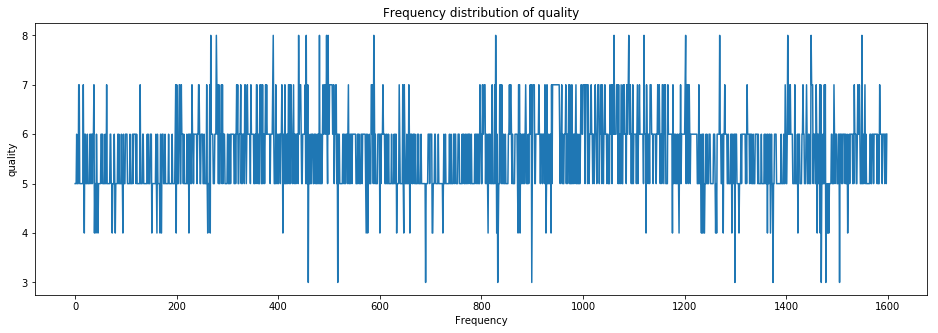

In [530]:
for i in df.columns:
    plt.figure(figsize=(16,5))
    plt.plot(df[i])
    plt.title("Frequency distribution of {}".format(i))
    plt.ylabel(i)
    plt.xlabel("Frequency")


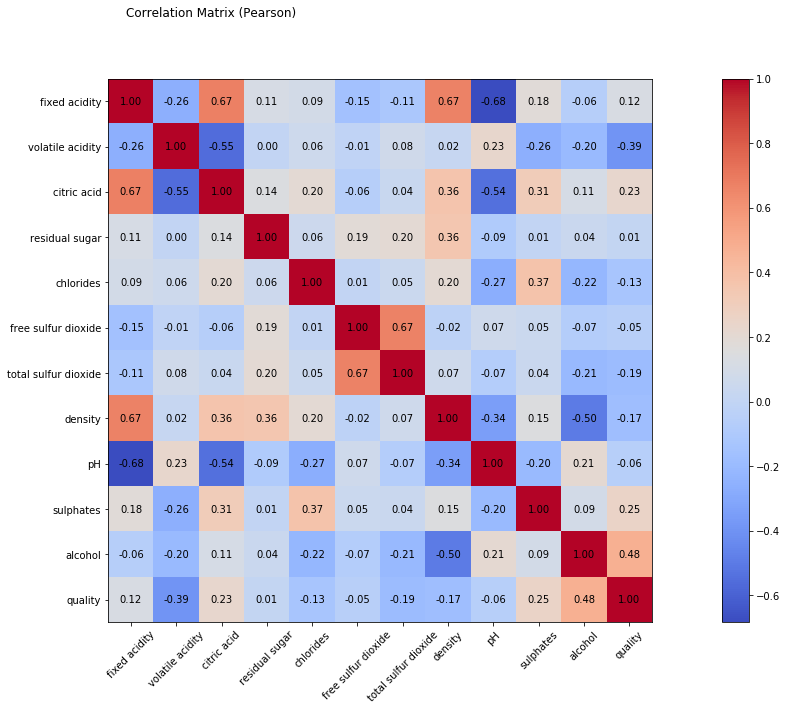

In [531]:
correlation_matrix = df.corr(method='pearson')
    
plt.figure(figsize=(25,10))

# Create a heatmap of the correlation matrix
plt.imshow(correlation_matrix, cmap='coolwarm')
plt.colorbar()

# Add column and row labels
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

# Add data values to each cell
for i in range(len(correlation_matrix.columns)):
  for j in range(len(correlation_matrix.columns)):
    plt.text(i, j, f"{correlation_matrix.iloc[i, j]:.2f}", ha='center', va='center')

plt.suptitle('Correlation Matrix (Pearson)')
plt.grid(False)
plt.show()

#### Data Preparation

Randomising the data for test train split

In [532]:
df_rand = df.sample(frac = 1)
df_rand

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1065,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2,6
184,6.7,0.620,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3,6
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4,6
302,8.3,0.705,0.12,2.6,0.092,12.0,28.0,0.99940,3.51,0.72,10.0,5
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
423,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0,7
913,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2,7
1217,8.2,0.340,0.37,1.9,0.057,43.0,74.0,0.99408,3.23,0.81,12.0,6
472,12.5,0.370,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.4,6


Setting up y 

In [533]:
y=np.zeros((df_rand.shape[0],10))
for i in range(df_rand.shape[0]):
    y[i,df_rand.quality[i]-1]=1
y[0:4,:]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

Setting up X

In [534]:
X = df_rand.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1065,7.7,0.610,0.18,2.4,0.083,6.0,20.0,0.99630,3.29,0.60,10.2
184,6.7,0.620,0.21,1.9,0.079,8.0,62.0,0.99700,3.52,0.58,9.3
608,10.1,0.650,0.37,5.1,0.110,11.0,65.0,1.00260,3.32,0.64,10.4
302,8.3,0.705,0.12,2.6,0.092,12.0,28.0,0.99940,3.51,0.72,10.0
834,8.8,0.685,0.26,1.6,0.088,16.0,23.0,0.99694,3.32,0.47,9.4
...,...,...,...,...,...,...,...,...,...,...,...
423,10.5,0.240,0.47,2.1,0.066,6.0,24.0,0.99780,3.15,0.90,11.0
913,9.4,0.395,0.46,4.6,0.094,3.0,10.0,0.99639,3.27,0.64,12.2
1217,8.2,0.340,0.37,1.9,0.057,43.0,74.0,0.99408,3.23,0.81,12.0
472,12.5,0.370,0.55,2.6,0.083,25.0,68.0,0.99950,3.15,0.82,10.4


Min Max Scaling the data manually

In [535]:
for i in range(X.shape[1]):
    max = X.iloc[:,i].max()
    min = X.iloc[:,i].min()
    for j in range(X.shape[0]):
        X.iloc[j,i] = (X.iloc[j,i]-min)/(max-min)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1065,0.274336,0.335616,0.18,0.102740,0.118531,0.070423,0.049470,0.457416,0.433071,0.161677,0.276923
184,0.185841,0.342466,0.21,0.068493,0.111853,0.098592,0.197880,0.508811,0.614173,0.149701,0.138462
608,0.486726,0.363014,0.37,0.287671,0.163606,0.140845,0.208481,0.919971,0.456693,0.185629,0.307692
302,0.327434,0.400685,0.12,0.116438,0.133556,0.154930,0.077739,0.685022,0.606299,0.233533,0.246154
834,0.371681,0.386986,0.26,0.047945,0.126878,0.211268,0.060071,0.504405,0.456693,0.083832,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
423,0.522124,0.082192,0.47,0.082192,0.090150,0.070423,0.063604,0.567548,0.322835,0.341317,0.400000
913,0.424779,0.188356,0.46,0.253425,0.136895,0.028169,0.014134,0.464023,0.417323,0.185629,0.584615
1217,0.318584,0.150685,0.37,0.068493,0.075125,0.591549,0.240283,0.294420,0.385827,0.287425,0.553846
472,0.699115,0.171233,0.55,0.116438,0.118531,0.338028,0.219081,0.692364,0.322835,0.293413,0.307692


#### Test Train Splitting

In [536]:
X_train = X.iloc[:1120,:]
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1065,0.274336,0.335616,0.18,0.102740,0.118531,0.070423,0.049470,0.457416,0.433071,0.161677,0.276923
184,0.185841,0.342466,0.21,0.068493,0.111853,0.098592,0.197880,0.508811,0.614173,0.149701,0.138462
608,0.486726,0.363014,0.37,0.287671,0.163606,0.140845,0.208481,0.919971,0.456693,0.185629,0.307692
302,0.327434,0.400685,0.12,0.116438,0.133556,0.154930,0.077739,0.685022,0.606299,0.233533,0.246154
834,0.371681,0.386986,0.26,0.047945,0.126878,0.211268,0.060071,0.504405,0.456693,0.083832,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
858,0.628319,0.109589,0.47,0.054795,0.070117,0.225352,0.091873,0.498532,0.322835,0.203593,0.338462
1066,0.176991,0.273973,0.08,0.102740,0.096828,0.169014,0.070671,0.257709,0.519685,0.233533,0.630769
1389,0.185841,0.246575,0.02,0.089041,0.113523,0.492958,0.371025,0.379589,0.283465,0.119760,0.200000
206,0.725664,0.123288,0.74,0.116438,0.138564,0.112676,0.077739,0.685022,0.362205,0.263473,0.369231


In [537]:
X_test = X.iloc[1120:,:]
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
518,0.557522,0.061644,0.49,0.130137,0.126878,0.140845,0.091873,0.523495,0.377953,0.209581,0.507692
1257,0.212389,0.315068,0.28,0.267123,0.121870,0.154930,0.222615,0.459618,0.456693,0.221557,0.400000
607,0.371681,0.246575,0.41,0.164384,0.133556,0.352113,0.162544,0.596916,0.448819,0.119760,0.323077
1155,0.327434,0.328767,0.25,0.089041,0.176962,0.112676,0.113074,0.447137,0.322835,0.119760,0.215385
1247,0.247788,0.294521,0.19,0.061644,0.116861,0.197183,0.098940,0.475771,0.590551,0.209581,0.323077
...,...,...,...,...,...,...,...,...,...,...,...
423,0.522124,0.082192,0.47,0.082192,0.090150,0.070423,0.063604,0.567548,0.322835,0.341317,0.400000
913,0.424779,0.188356,0.46,0.253425,0.136895,0.028169,0.014134,0.464023,0.417323,0.185629,0.584615
1217,0.318584,0.150685,0.37,0.068493,0.075125,0.591549,0.240283,0.294420,0.385827,0.287425,0.553846
472,0.699115,0.171233,0.55,0.116438,0.118531,0.338028,0.219081,0.692364,0.322835,0.293413,0.307692


In [538]:
y_train = y[:1120,:]
print(y_train.shape)
y_train

(1120, 10)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [539]:
y_test = y[1120:,:]
print(y_test.shape)
y_test

(479, 10)


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Making Neural Network

Initialising Random weights and biases

In [540]:
w1 = np.random.rand(11,17)
b1 = np.random.rand(17,)
w2 = np.random.rand(17,17)
b2 = np.random.rand(17,)
wo = np.random.rand(17,10)
bo = np.random.rand(10,)

Defining functions ReLU, softmax, forward layer 1, forward layer 2, and forward output.

In [541]:
def ReLU(x):
    return np.maximum(0,x)

def softmax(x):
    for i in range(x.shape[0]):
        sum = np.exp(x[i,:]).sum()
        x[i,:] = np.exp(x[i, :])/sum    
    return x

def forward_l1(wei1, bi1, X_train_b):
    l1 = np.dot(X_train_b,wei1) + bi1
    return l1

def forward_l2(l1_a, wei2, bi2):
    l2 = np.dot(l1_a,wei2) + bi2
    return l2

def forward_op(l1_a, weio, bio):
    op = np.dot(l1_a, weio) + bio
    return op


Function to find Loss

In [542]:
def ls(op, y_train_b):
    L = np.zeros((op.shape[0],))
    for i in range(op.shape[0]):
        L[i] = np.dot(y_train_b[i,:], np.log(op[i,:]))*-1
    return L


In [543]:
def Neu_net(wei1, bi1, wei2, bi2, weio, bio, X_train_b, y_train_b, alpha):
    global w1
    global w2
    global wo
    global b1
    global b2
    global bo

    # forward propagation layer 1
    l1 = forward_l1(wei1, bi1,X_train_b)
    l1_a = ReLU(l1)

    # forward propagation layer 2
    l2 = forward_l2(l1_a, wei2, bi2)
    l2_a = ReLU(l2)

    # forward propagation output layer
    op = forward_op(l2_a, weio, bio)
    op_s = softmax(op)


    # calculation loss and then cost
    loss = ls(op_s, y_train_b)
    cost = 0.0
    for i in loss:
        cost += i
    cost /= X_train_b.shape[0]
    


    # back propagation output layer
    subt = (op_s-y_train_b)
    wo_der = np.dot(subt.T,l2_a).T
    bo_der = np.zeros((10,))
    for i in range(subt.shape[0]):
        bo_der += subt[i,:]
    
    # back propagation second layer
    f2_der = l2
    for i in range(f2_der.shape[0]):
        for i2 in range(f2_der.shape[1]):
            if f2_der[i,i2] > 0:
                f2_der[i,i2] = 1
            else:
                f2_der[i,i2] = 0
    dz_2 = np.multiply(np.dot(wo, subt.T).T, f2_der)            
    w2_der = np.dot(dz_2.T, l1_a).T
    b2_der = np.zeros((17,))
    for i in range(dz_2.shape[0]):
        b2_der += dz_2[i,:]
    
    # back propagation first layer
    f1_der = l1
    for i in range(f1_der.shape[0]):
        for i2 in range(f1_der.shape[1]):
            if f1_der[i,i2] > 0:
                f1_der[i,i2] = 1
            else:
                f1_der[i,i2] = 0
    dz_1 = np.multiply(np.dot(w2, dz_2.T).T, f1_der)
    w1_der = np.dot(dz_1.T, X_train_b).T
    b1_der = np.zeros((17,))
    for i in range(dz_1.shape[0]):
        b1_der += dz_1[i,:]
    

    # updating all weights and biases together
    wo -= (alpha/X_train_b.shape[0])*wo_der
    bo -= (alpha/X_train_b.shape[0])*bo_der
    w2 -= (alpha/X_train_b.shape[0])*w2_der
    b2 -= (alpha/X_train_b.shape[0])*b2_der
    w1 -= (alpha/X_train_b.shape[0])*w1_der
    b1 -= (alpha/X_train_b.shape[0])*b1_der

    return cost
    

Selecting batch size and learning rate and training the neural network


NOTE : BEFORE RUNNING THE TRAIN CELL AGAIN, RUN THE CELL THAT ASSIGNS RANDOM VALUES TO WEIGHTS AND BIASES AS RUNNING THE TRAIN CELL AGAIN AND AGAIN CAUSES VANISHING GRADIENT PROBLEM.

In [544]:
alph = 0.001
b_size = 16


# training loop
j=0
while j + b_size - 1 < X_train.shape[0]:

    # cost
    c = Neu_net(w1,b1,w2,b2,wo,bo,X_train[j:j+4],y_train[j:j+4], alpha=0.005)
    print("Cost : ",c)

    # print("b1 \t{} ,\n b2 \t{},\n bo \t{},\n w1 \t{},\n w2 \t{},\n wo \t{}\n\n".format(b1,b2,bo,w1,w2,wo))
    j += b_size


Cost :  25.061964027830346
Cost :  8.975923350555574
Cost :  10.321127924778295
Cost :  2.9020943741743808
Cost :  8.322384424673127e-09
Cost :  8.760983616386444e-10
Cost :  9.63270712334641
Cost :  11.582940339668623
Cost :  3.1726616050020655
Cost :  7.901101302034682
Cost :  8.838180910329077
Cost :  6.685470196319619
Cost :  1.023263625574467e-06
Cost :  13.081055910051472
Cost :  10.157988085491464
Cost :  2.503594680935307
Cost :  17.638407158041975
Cost :  8.105207771387937
Cost :  21.170102172089216
Cost :  6.908426846424562
Cost :  4.591338388031471
Cost :  13.202323734315064
Cost :  17.65313621336705
Cost :  8.637416908135346
Cost :  20.61326532999764
Cost :  3.0383852920021623
Cost :  1.3163381812145671
Cost :  11.127493626121217
Cost :  0.012026871676498987
Cost :  1.3109259997235683
Cost :  9.002535515757945
Cost :  8.830904383069125
Cost :  14.305629868739342
Cost :  12.988982450368654
Cost :  2.878620451048915
Cost :  25.572345358098072
Cost :  6.980612951641824
Cost : 

#### Finding Error 

Function to find mean square error

In [545]:
def test_error(X_test, y_test):
    global w1
    global w2
    global wo
    global b1
    global b2
    global bo
    # forward propagation layer 1
    l1 = forward_l1(w1, b1,X_test)
    l1_a = ReLU(l1)

    # forward propagation layer 2
    l2 = forward_l2(l1_a, w2, b2)
    l2_a = ReLU(l2)

    # forward propagation output layer
    op = forward_op(l2_a, wo, bo)
    op_s = softmax(op)


    err = 0 
    for i in range(op_s.shape[0]):
        diff = np.argmax(op_s[i,:]) - np.argmax(y_test[i,:])
        err += diff**2
        
    err /= X_test.shape[0]

    return err


In [546]:
te = (test_error(X_test, y_test))
print("Mean Square Error = {}".format(te))


Mean Square Error = 0.7974947807933194


`Now change batch size and learning rate (alpha) to minimise mean square error`